In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pi = np.pi

plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

In [2]:
def rect(omega, omega_0):
    return 1.0*(np.abs(omega/omega_0) < 1/2) if omega_0 > 0 else omega_0*0

def tri(omega, omega_0):
        return np.maximum(1-np.abs(omega/omega_0), 0) if omega_0 > 0 else omega_0*0

def plot_spectrum(omega, X, xlabel=r'$\omega/\omega_0$', ylabel=''):
    plt.axvline(lw=0.75, c='k')
    plt.plot(omega, X, lw=4);

    plt.axhline(lw=0.75, c='k')
    plt.ylim((1.5*min(X), 1.5*max(X)))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True);

# Aufgabe 23: Amplitudenmodulation

## 23.1:
Zeigen Sie , dass das Energiedichtespektrum eines Signals $x(t)$ dem Energiedichtespektrum seiner Hilberttransformierten $\hat{x}(t)$ entspricht.

Wenn ein Signal gegeben ist, lässt sich die Hilberttransformierte durch Multiplikation mit der Übertragungsfunktion des Hilberttransformators gewinnen:

\begin{align}
    \hat{X}(j\omega) &= H_H(j\omega) \cdot X(j\omega) \\
    \text{  mit  } \qquad H_H(j\omega) &= -j\mathrm{sgn}(j\omega)
\end{align}

Das **Energie**dichtespektrum ergibt sich als Betragsquadrat des Spektrums:

\begin{align}
    \Phi_{xx}^\mathrm{E}(j\omega) = \left|X(j\omega)\right|^2
\end{align}

Damit ergibt sich sofort für das Energiedichtespektrum der Hilberttransformierten:

\begin{align}
    \Phi_{\hat{x}\hat{x}}^\mathrm{E}(j\omega) = \left|\hat{X}(j\omega)\right|^2 = \underbrace{\left| -j\mathrm{sgn}(j\omega) \right|^2}_{= 1 \ \forall \omega \neq 0} \cdot \left|X(j\omega)\right|^2 = \Phi^\mathrm{E}_{xx}(j\omega) \quad \forall \omega \neq 0
\end{align}

Die Gleichheit gilt dabei nur auf einer Nullmenge nicht. Deshalb kommt bei Integration über alle Frequenzen dieselbe Energie heraus und die Energiedichtespektren können als gleich angesehen werden.

## 23.2:
Zeigen Sie, dass das Spektrum der Hilberttransformierten $\hat{x}(t)$ durch eine Phasenverschiebung aus dem Spektrum des Signals $x(t)$ hervorgeht und bestimmen Sie die Phasenverschiebung für $\omega >0$ bzw. $\omega < 0$.

Ab jetzt sei folgender **Amplitudenmodulationssender** gegeben:

![Sender](figures/A23/Blockdiagramm_Sender.png)

Der Tiefpass besitze die Impulsantwort $h_{\mathrm{TP}}(t) = \frac{\omega_0}{\pi}\mathrm{si}(\omega_0 t)$ und das Eingangssignal sei durch $x(t) = \frac{\omega_0}{\pi}\mathrm{si}^2\left(\frac{\omega_0 t}{2}\right)\left(1 + \cos(2\omega_0 t)\right)$ gegeben. Weiterhin sei $\omega_1 \gg \omega_0$.

## 23.3:
Berechnen Sie die Fouriertransformierte $S(j\omega)$ des Signals $s(t)$ und skizzieren sie $X(j\omega)$ und $S(j\omega)$.

Zunächst gilt mit Dualitäts- und Ähnlichkeitssatz:

\begin{align}
    \mathcal{F}\left\{ \Lambda(t) \right\} = \mathrm{si}^2\left( \frac{\omega}{2} \right) \qquad &\Leftrightarrow \qquad \mathcal{F}\left\{ \frac{1}{2 \pi} \mathrm{si}^2 \left( \frac{t}{2} \right) \right\} = \Lambda(-\omega) \\
    \Rightarrow \mathcal{F}\left\{ 2\frac{\omega_0}{2 \pi} \mathrm{si}^2 \left( \frac{\omega_0 t}{2} \right) \right\} &= 2 \Lambda \left( \frac{\omega}{\omega_0} \right).
\end{align}

Das Spektrum von $x(t)$ ergibt sich durch den Modulationssatz:

\begin{align}
    X(j\omega) &= \frac{1}{2 \pi}  2 \Lambda \left( \frac{\omega}{\omega_0} \right) \ast 2 \pi \left(\delta(\omega) + \delta(\omega-2\omega_0) + \delta(\omega + 2\omega_0) \right) \\
    &= 2 \left( \Lambda \left( \frac{\omega}{\omega_0} \right) + \Lambda \left( \frac{\omega-2\omega_0}{\omega_0} \right) + \Lambda \left( \frac{\omega +2\omega_0}{\omega_0} \right) \right)
\end{align}

Für das LTI-System gilt mit dem Faltungssatz

\begin{align}
    s(t) = h_{\mathrm{TP}}(t) \ast x(t) \qquad \Leftrightarrow \qquad S(j\omega) = H_{\mathrm{TP}}(j\omega) \cdot X(j\omega).
\end{align}

Damit folgt mit $H_\mathrm{TP}(j\omega) = \mathrm {rect}\left( \frac{\omega}{2 \omega_0} \right)$ und $\omega_1 \gg \omega_0$:

\begin{align}
    S(j\omega) &= 2 \left( \Lambda \left( \frac{\omega}{\omega_0} \right) + \Lambda \left( \frac{\omega-2\omega_0}{\omega_0} \right) + \Lambda \left( \frac{\omega +2\omega_0}{\omega_0} \right) \right) \mathrm {rect}\left( \frac{\omega}{2 \omega_0} \right) \\
    &= 2 \Lambda \left( \frac{\omega}{\omega_0} \right).
\end{align}

In [3]:
omega = np.linspace(-30, 30, 10000)
W = 2
omega_0 = 2
omega_1 = 2.5*omega_0
four_omega_1 = 4*omega_1

#### Spektrum des Eingangssignals $x(t)$:

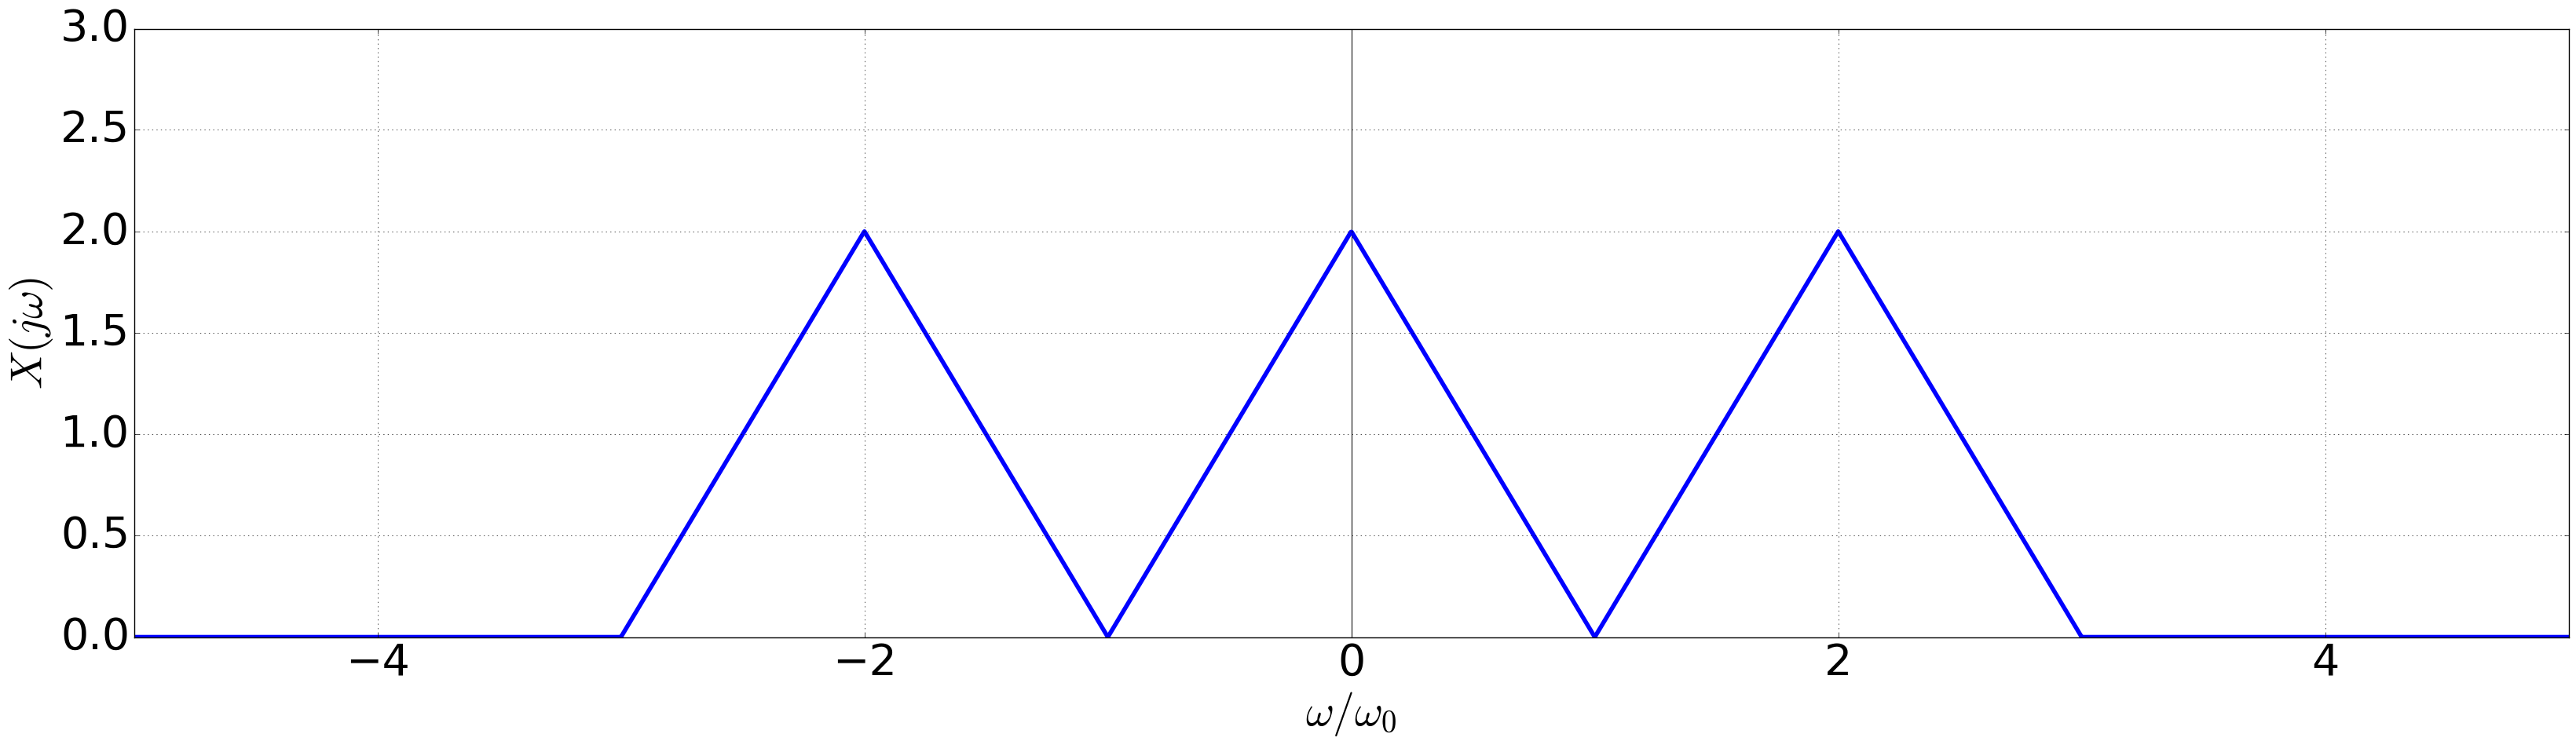

In [4]:
X_w = 2*(tri(omega, omega_0) + 
         tri(omega - 2*omega_0, omega_0) +
         tri(omega + 2*omega_0, omega_0))

plot_spectrum(omega/omega_0, X_w, ylabel=r'$X(j\omega)$')
plt.xlim((-5, 5));

#### Spektrum des bandbegrenzten Eingangssignals $s(t)$:

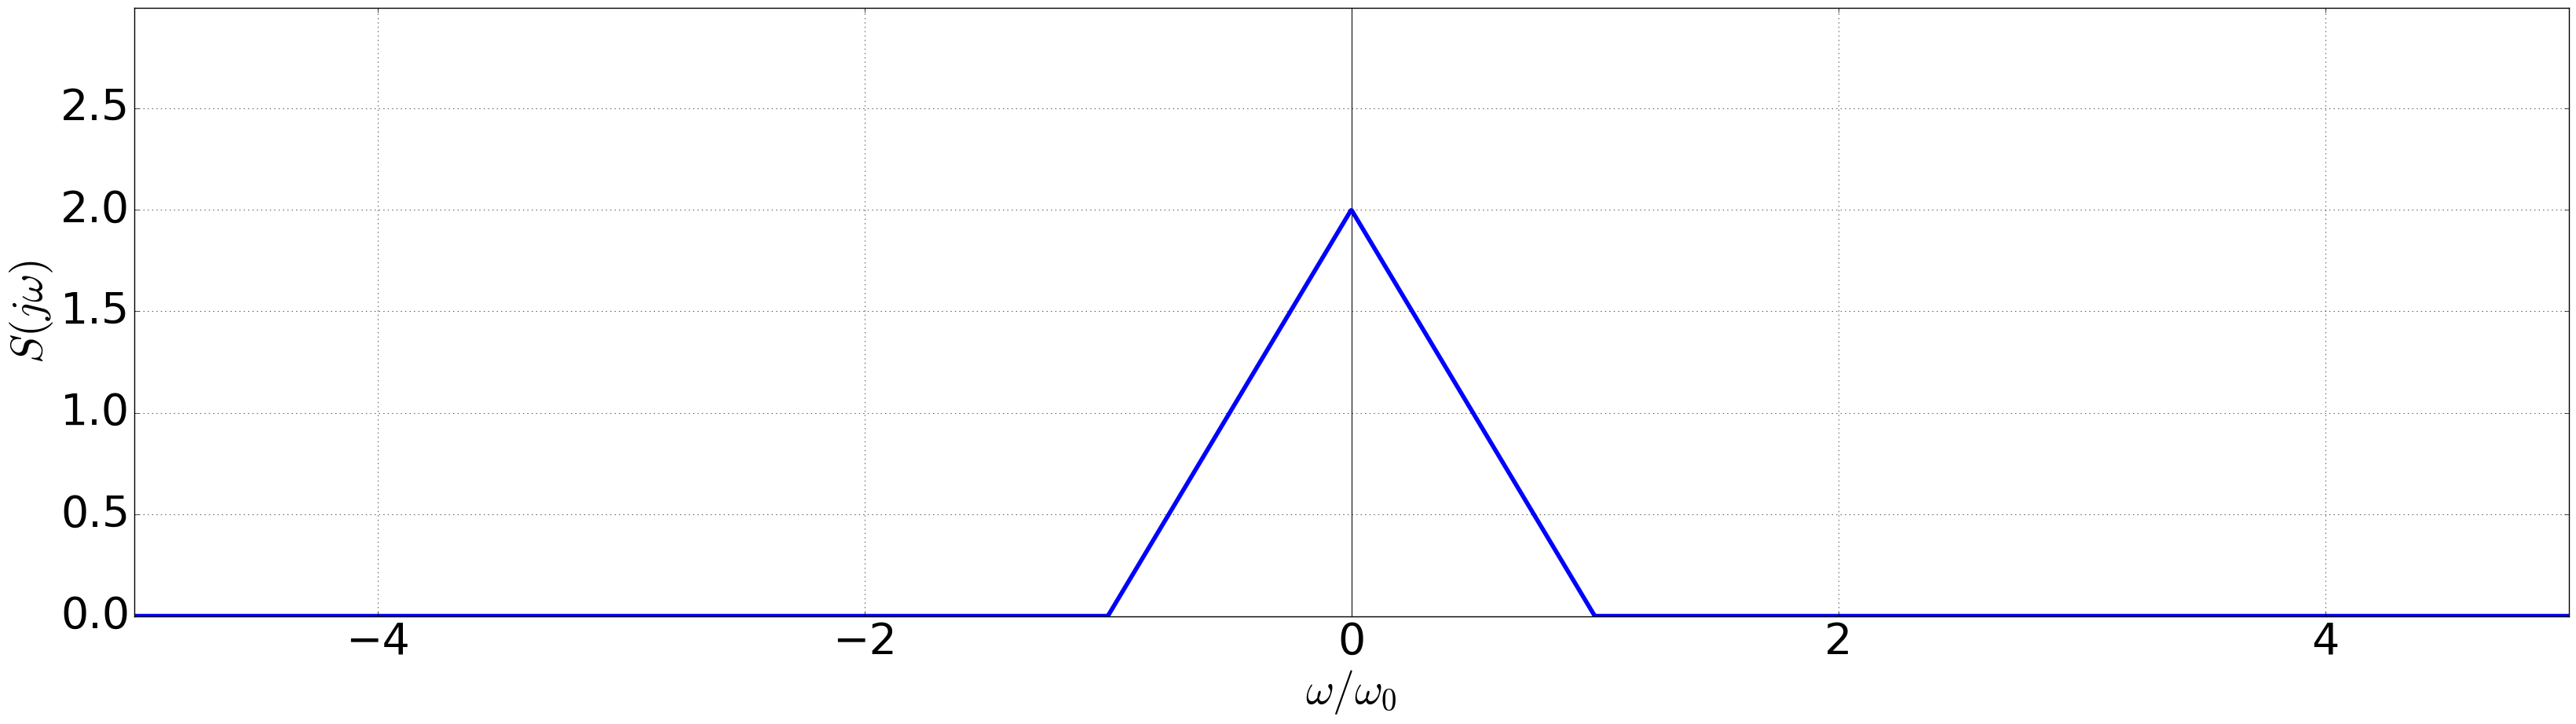

In [5]:
S_w = 2*(tri(omega, omega_0))

plot_spectrum(omega/omega_0, S_w, ylabel=r'$S(j\omega)$')
plt.xlim((-5, 5));

## 23.4:
Berechnen und skizzieren Sie die Fouriertransformierte $X_{\mathrm{BP}}(j\omega)$ des Sendesignals $x_{\mathrm{BP}}(t)$.

Aus dem Blockschaltbild lässt sich ablesen:

\begin{align}
    x_\mathrm{BP}(t) = s(t) \cdot \sqrt{2} \cos(4 \omega_1)
\end{align}

Damit folgt im Frequenzbereich mit dem **Modulationssatz**:

\begin{align}
    X_\mathrm{BP}(j\omega) &= \frac{\sqrt{2}}{2}\left( S(j(\omega - 4\omega_1)) + S(j(\omega - 4\omega_1)) \right) \\
    &= \sqrt{2} \left( \Lambda\left(\frac{\omega - 4\omega_1}{\omega_0} \right) + \Lambda\left(\frac{\omega + 4\omega_1}{\omega_0} \right) \right).
\end{align}

Nach dem Hochmischen hat das Signal eine einseitige Bandbreite von $2\omega_0$.

#### Spektrum des Sendesignals $x_\mathrm{BP}(t)$ mit :

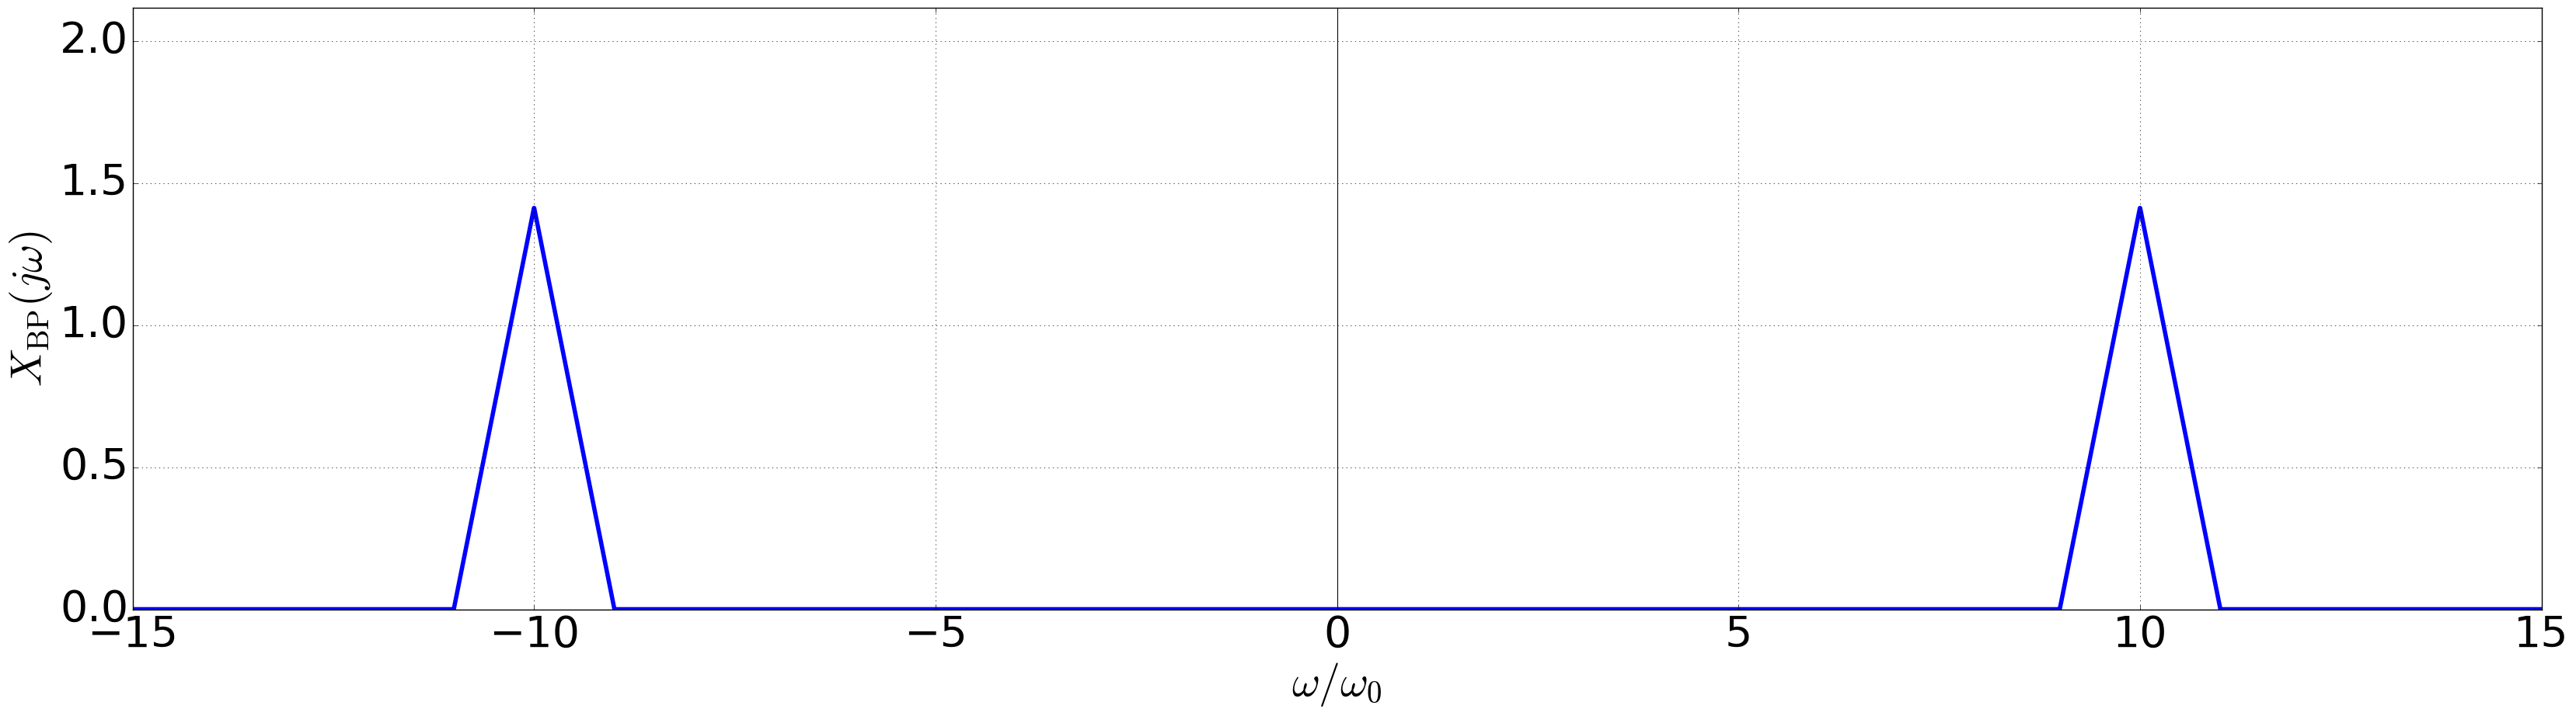

In [6]:
X_BP_w = np.sqrt(2)*(tri(omega - four_omega_1, omega_0) +
                     tri(omega + four_omega_1, omega_0))  

plot_spectrum(omega/omega_0, X_BP_w, ylabel=r'$X_\mathrm{BP}(j\omega)$')
plt.xlim((-15, 15));

Bei der bisher betrachteten **Zweiseitenband-Amplitudenmodulation** belegt das Sendesignal $x_{\mathrm{BP}}(t)$ mehr Bandbreite als das Quellensignal $s(t)$.


## 23.5:
Wie muss die Übertragungsfunktion des Bandpassfilters $H_{\mathrm{BP}}(j\omega)$ lauten, der die Bandbreite des Sendesignals auf die Bandbreite von $s(t)$ beschränkt, sodass der folgende Empfänger immer noch in der Lage ist, das Sendesignal zurückzugewinnen?

Es kann ausgenutzt werden, dass für ein reellwertiges Signal die Symmetriebeziehung $S(-j\omega) = S^{\ast}(j\omega)$ gilt. Das heißt, es kann der positive oder negative Anteil des Spetrums vor dem Hochmischen unterdrückt werden, was auf das Verfahren der **Einseitenband-Amplitudenmodulation** (SSB) führt.

Dies kann auch im Bandbassbereich durchgeführt werden, indem z.B. das obere Seitenband des Spektrums unterdrückt wird. Dann wird nur das untere Seitenband gesendet. Dies lässt sich mit dem Bandpassfilter mit der Mittenfrequenz $\omega_1-\omega_0/2$ und der Bandbreite $\omega_0$ erreichen:

\begin{align}
    H_\mathrm{BP}(j\omega) = \mathrm{rect}\left( \frac{\omega - (4\omega_1-\omega_0/2)}{\omega_0} \right) + \mathrm{rect}\left( \frac{\omega + (4\omega_1-\omega_0/2)}{\omega_0} \right)
\end{align}

Damit ergibt sich: 

\begin{align}
    Y_\mathrm{BP}(j\omega) = \sqrt{2} \left( \mathrm{rect}\left( \frac{\omega - (4\omega_1-\omega_0/2)}{\omega_0} \right) \cdot \Lambda\left(\frac{\omega - 4\omega_1}{\omega_0} \right) + \mathrm{rect}\left( \frac{\omega +(4\omega_1-\omega_0/2)}{\omega_0} \right) \cdot \Lambda\left(\frac{\omega + 4\omega_1}{\omega_0} \right) \right)
\end{align}

#### Spektrum des SSB-Signals $y_\mathrm{BP}(t)$:

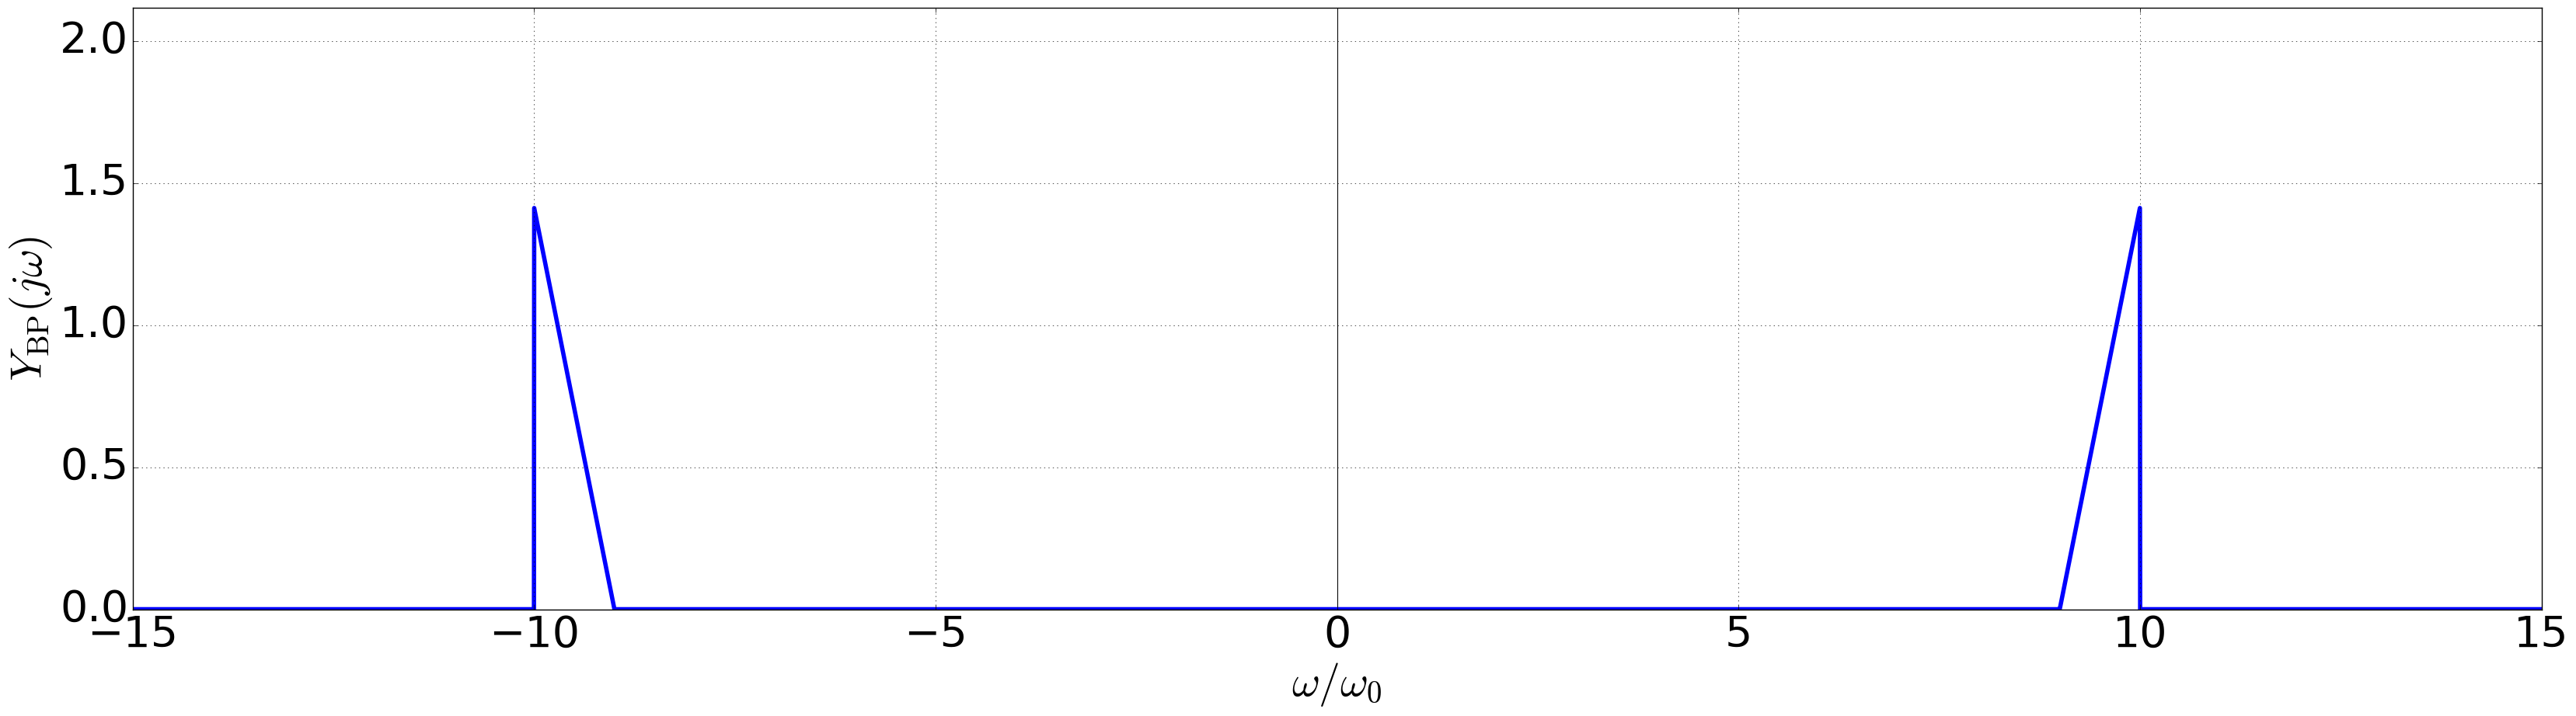

In [7]:
# Definition Bandpass fuer unteres Seitenband
omega_c = four_omega_1 - omega_0/2
W = omega_0
H_BP_w = rect(omega - omega_c, W) + rect(omega + omega_c, W)

# Bandpass-Filterung
Y_BP_w = X_BP_w*H_BP_w

plot_spectrum(omega/omega_0, Y_BP_w, ylabel=r'$Y_\mathrm{BP}(j\omega)$')
plt.xlim((-15, 15));

Die nachfolgende Abbildung zeigt eine Demodulatorstruktur mit Hilberttransformator, die zum Empfang des Signals genutzt werden kann. Dabei wird zunächst das analytische Signal $y^{+}(t)$ gebildet. Anschließend wird das Signal heruntergemischt und abgetastet.    
**Hinweis**: Es gelte $y(t)$ = $y_\mathrm{BP}(t)$.

![Empfänger](figures/A23/Blockdiagramm_Empfaenger.png)

## 23.6:
Berechnen und skizzieren Sie die Fouriertransformierte des analytischen Signals $Y^{+}(j\omega)$.

Aus dem Blockschaltbild folgt:

\begin{align}
    y^{+}(t) = \frac{1}{\sqrt{2}} \left( y(t) + j \hat{y}(t) \right) \quad \Leftrightarrow \quad 
    Y^{+}(j\omega) = \frac{1}{\sqrt{2}} \left( Y(j\omega) + j \hat{Y}(j\omega) \right)
\end{align}

Aus dem Blockschaltbild folgt:

\begin{align}
    y^{+}(t) = \frac{1}{\sqrt{2}} \left( y(t) + j \hat{y}(t) \right) \quad \Leftrightarrow \quad 
    Y^{+}(j\omega) = \frac{1}{\sqrt{2}} \left( Y(j\omega) + j \hat{Y}(j\omega) \right)
\end{align}

Das Spektrum $j \hat{Y}(j\omega)$ kann mit der Übertragungsfunktion des Hilberttransformators $    jH_h(j\omega) = \mathrm{sgn}(\omega)$ berechnet werden:

\begin{align}
    j \hat{Y}_\mathrm{BP}(j\omega) &= \sqrt{2} \left( \mathrm{rect}\left( \frac{\omega - (4\omega_1-\omega_0/2) }{\omega_0} \right) \cdot \Lambda\left(\frac{\omega - 4\omega_1}{\omega_0} \right) - \mathrm{rect}\left( \frac{\omega + (4\omega_1-\omega_0/2)}{\omega_0} \right) \cdot \Lambda\left(\frac{\omega + 4\omega_1}{\omega_0} \right) \right)
\end{align}

Werden die beiden Signale $y(t)$ und $j\hat{y}(t)$ addiert, löschen sich die negativen Frequenzanteile aus und die positiven Frequenzanteile werden addiert.
Damit ergibt sich für das Spektrum des Analytischen Signals:

\begin{align}
    Y^{+}(j\omega) = 2\ \mathrm{rect}\left( \frac{\omega - (4\omega_1-\omega_0/2) }{\omega_0} \right) \cdot \Lambda\left(\frac{\omega - 4\omega_1}{\omega_0} \right)
\end{align}

#### Spektrum des analytischen Signals $y^{+}(t)$:

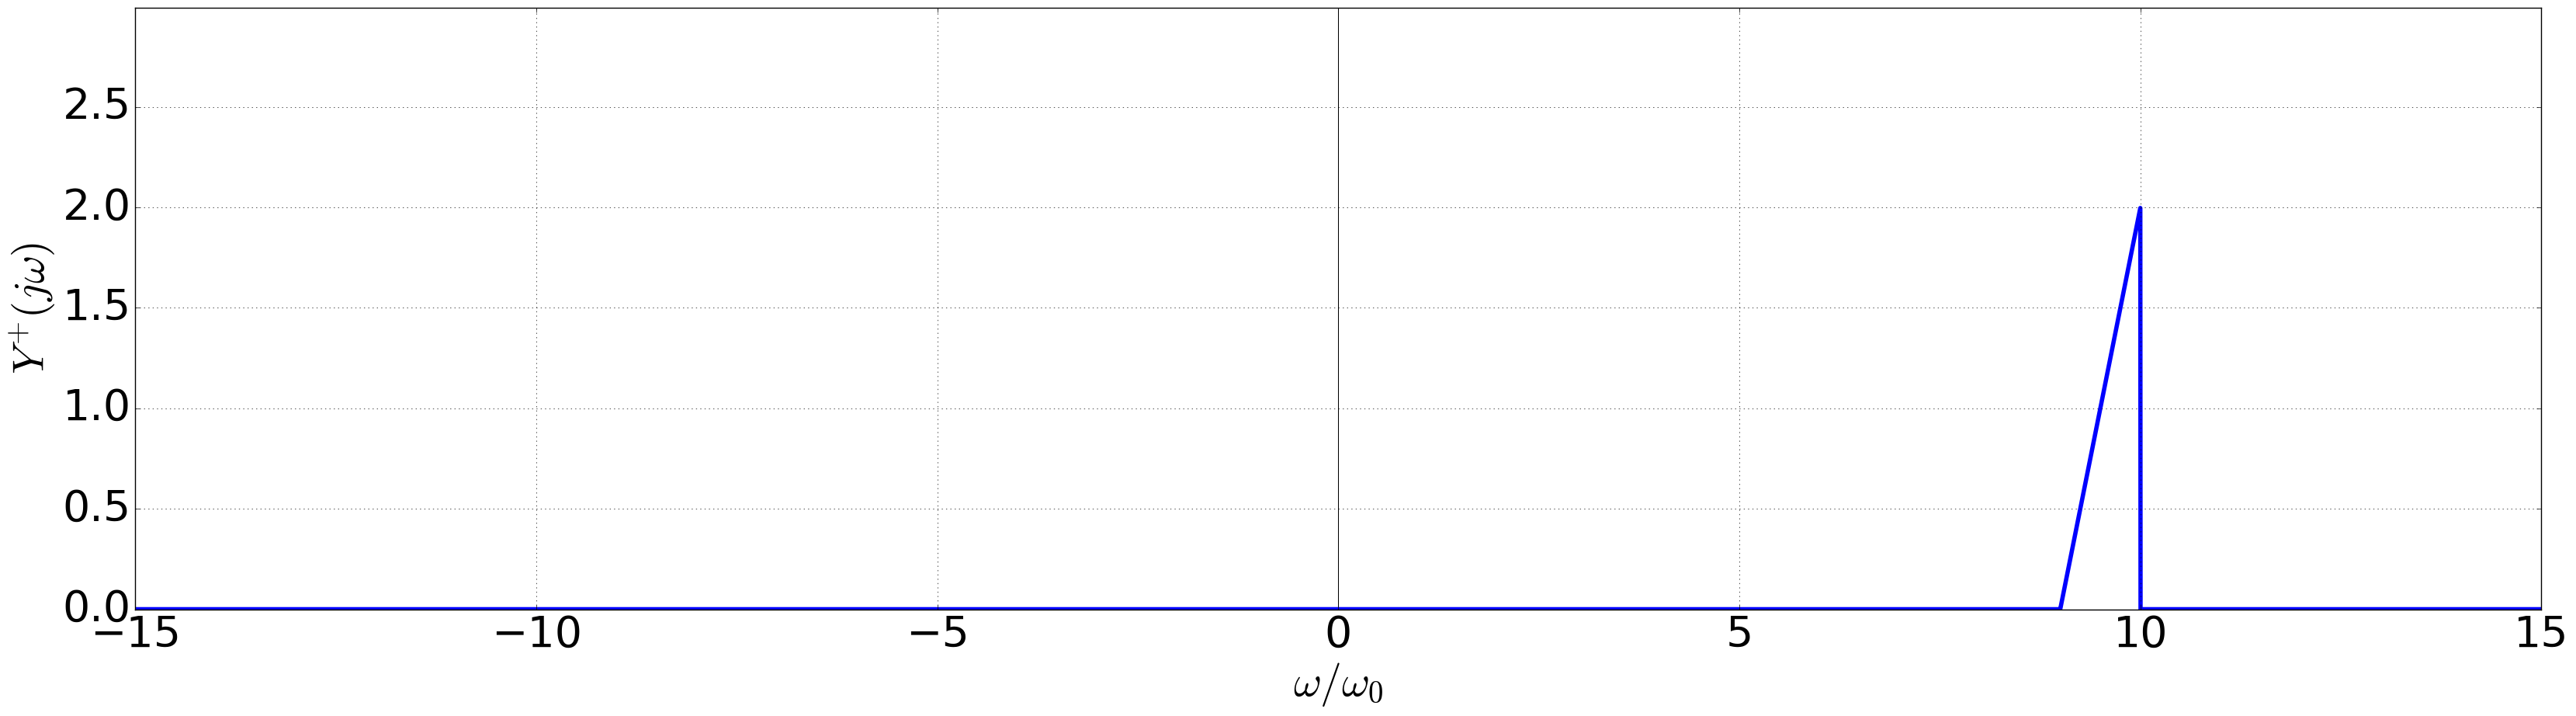

In [8]:
# Analytisches Signal
Y_plus_w = np.sqrt(2)*Y_BP_w*(omega > 0)

plot_spectrum(omega/omega_0, Y_plus_w, ylabel=r'$Y^{+}(j\omega)$')
plt.xlim((-15, 15));

## 23.7:
Bestimmen Sie das Spektrum des Empfangssignals $R(j\omega)$. Erläutern Sie anschließend, warum $R(j\omega)$ nicht dem Quellsignalspektrum $S(j\omega)$ entspricht und wie der Empfänger $s(t)$ aus $r(t)$ zurückgewinnen kann.

Durch Heruntermischen werden die positiven Spektralanteile des analytischen Signals ins Basisband heruntergemischt. Das folgt aus dem Modulationssatz:

\begin{align}
    r(t) &= y^{+}(t)\mathrm{e}^{-j4\omega_1 t} \\[1em]
    \Rightarrow \quad R(j\omega) &= Y^{+}(j(\omega - 4\omega_1)) \\
    &= 2\ \mathrm{rect}\left( \frac{\omega + \omega_0/2) }{\omega_0} \right) \cdot \Lambda\left(\frac{\omega}{\omega_0} \right)
\end{align}

#### Spektrum des Empfangssignals $r(t)$:

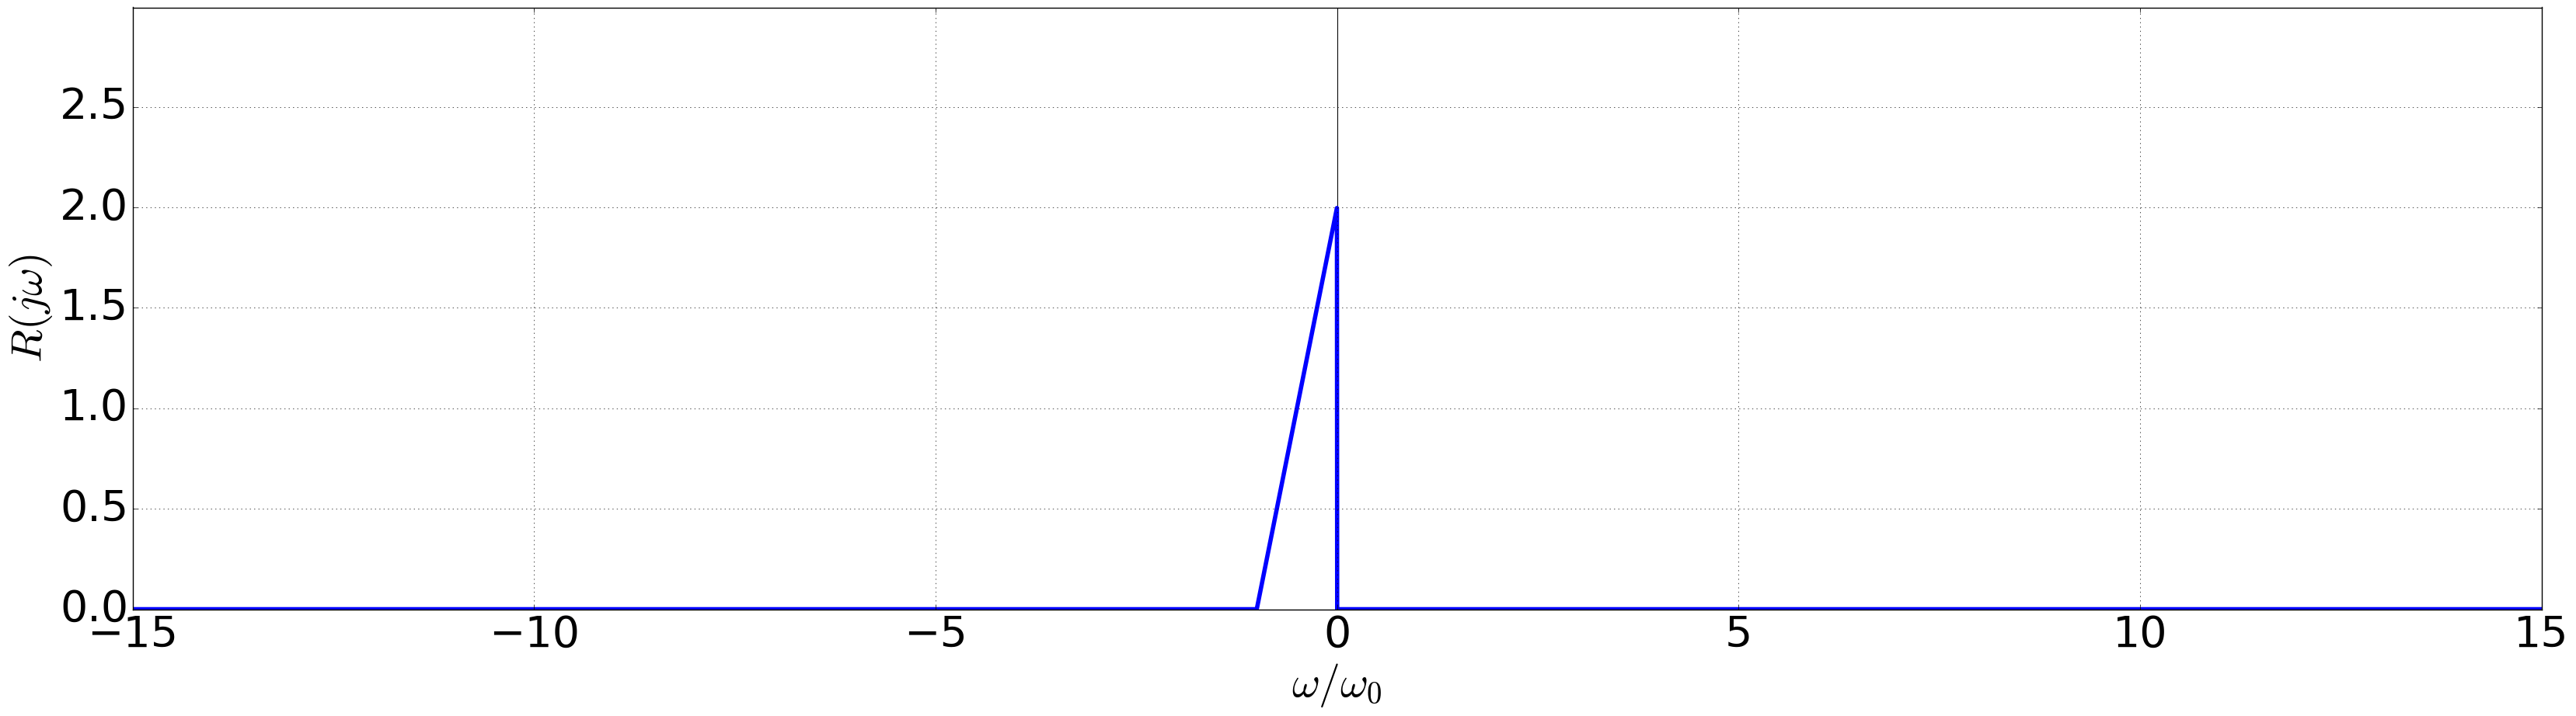

In [9]:
R_w = 2*rect(omega+omega_0/2, omega_0)*tri(omega, omega_0)

plot_spectrum(omega/omega_0, R_w, ylabel=r'$R(j\omega)$')
plt.xlim((-15, 15));

$R(j\omega)$ enthält nur die negativen Frequenzanteile von $S(j\omega)$. Wegen der Symmetriebeziehung reellwertiger Signale

\begin{align}
    s(t) = s^{\ast}(t) \quad \Leftrightarrow \quad S(j\omega) = S^{\ast}(-j\omega)
\end{align}

lässt sich das komplette Spektrum jedoch rekonstruieren:

\begin{align}
    S(j\omega) = R(j\omega) + R^{\ast}(-j\omega) \quad \Leftrightarrow \quad s(t) = 2\mathrm{Re}\left\{ r(t) \right\}
\end{align}